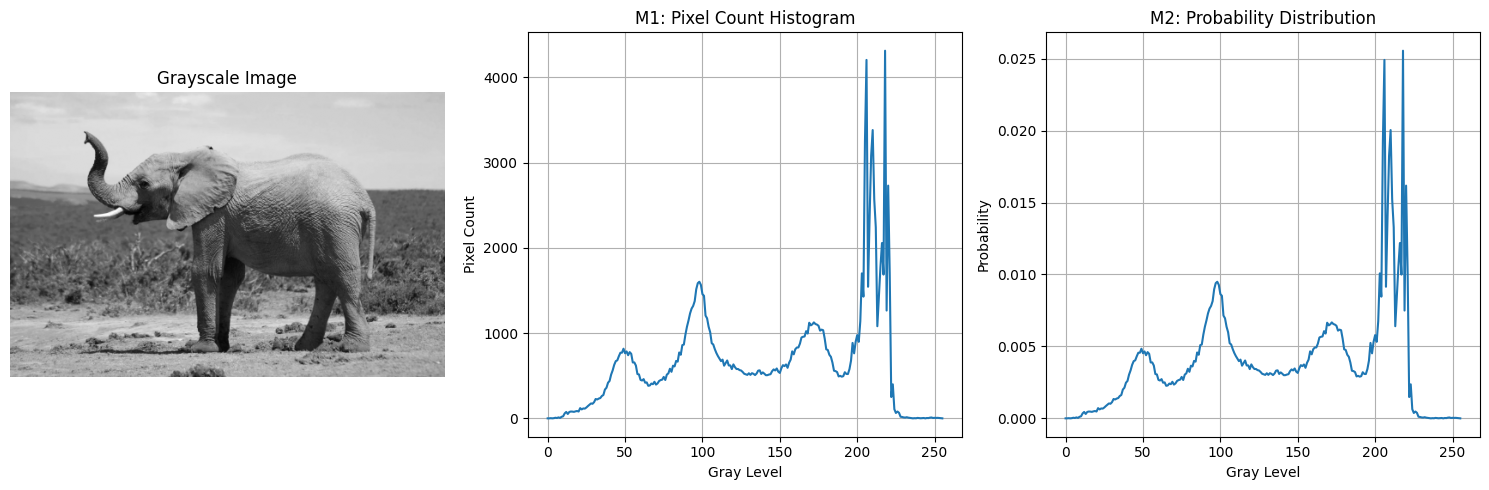

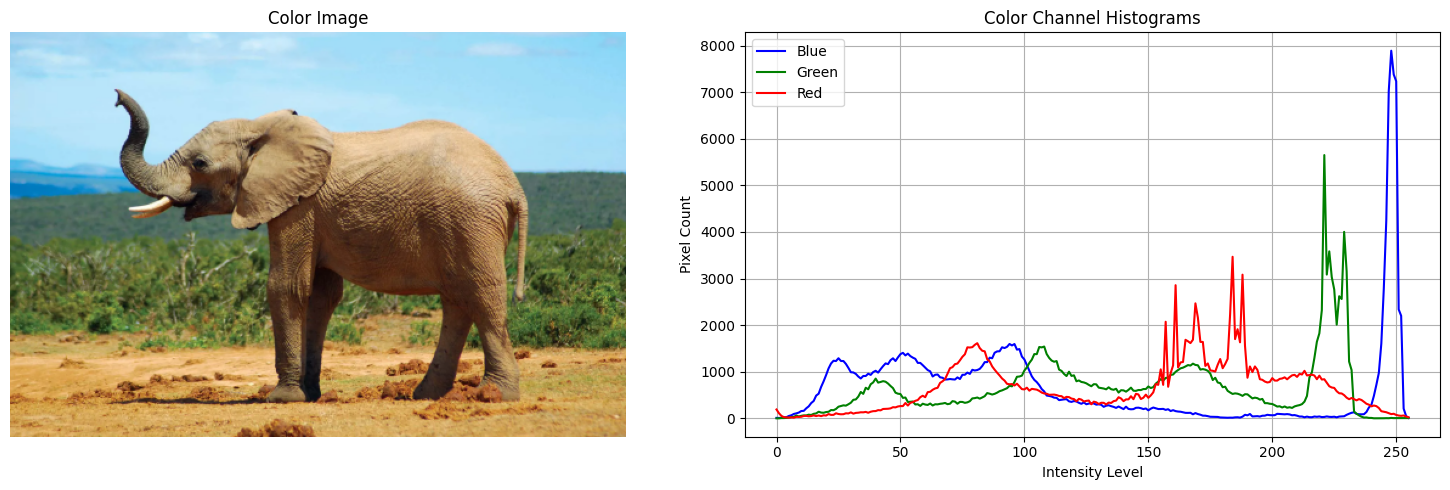

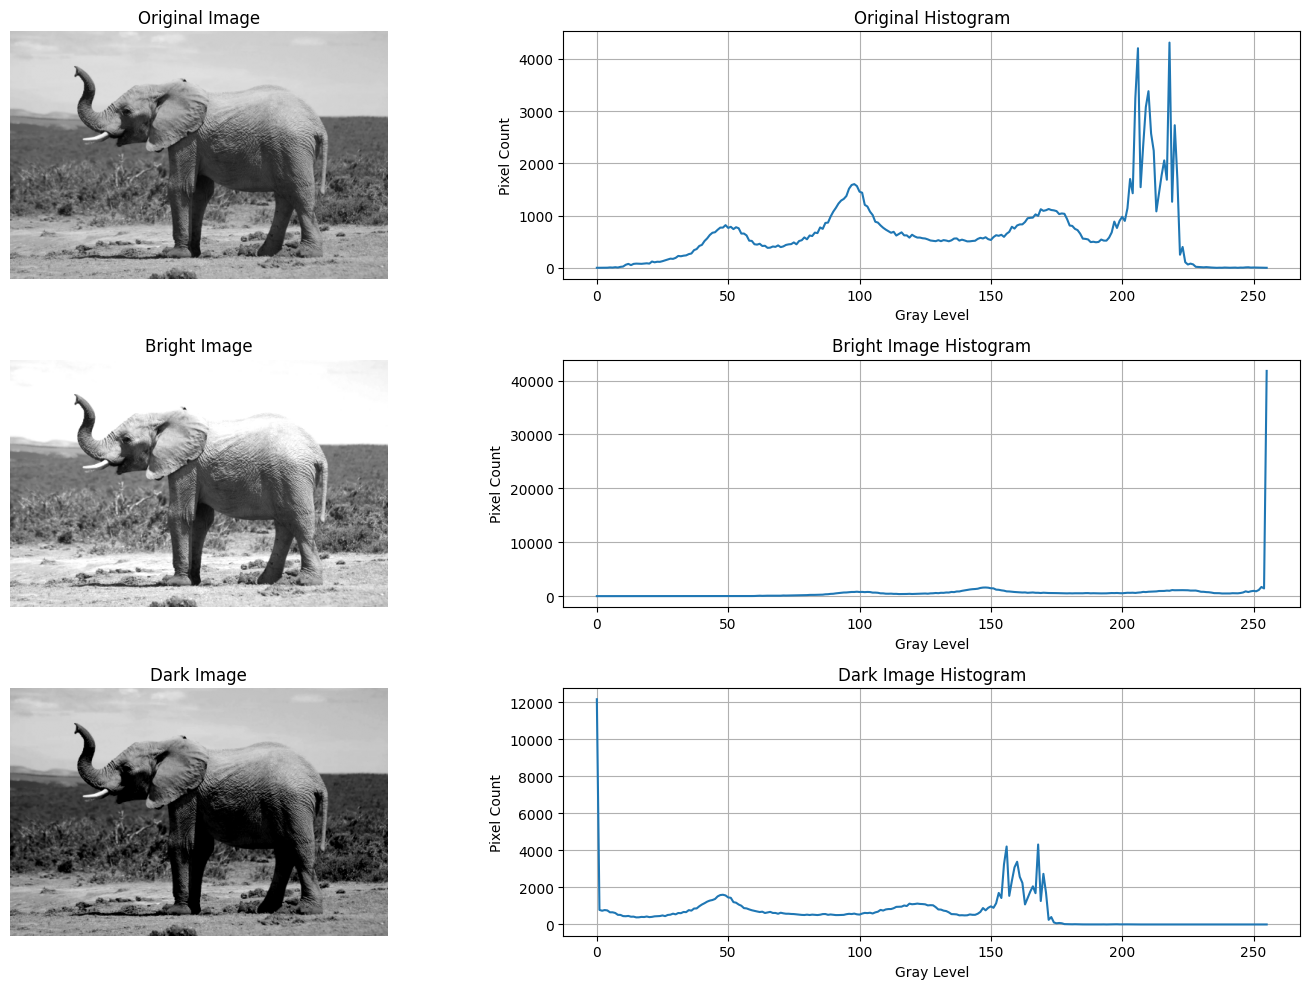

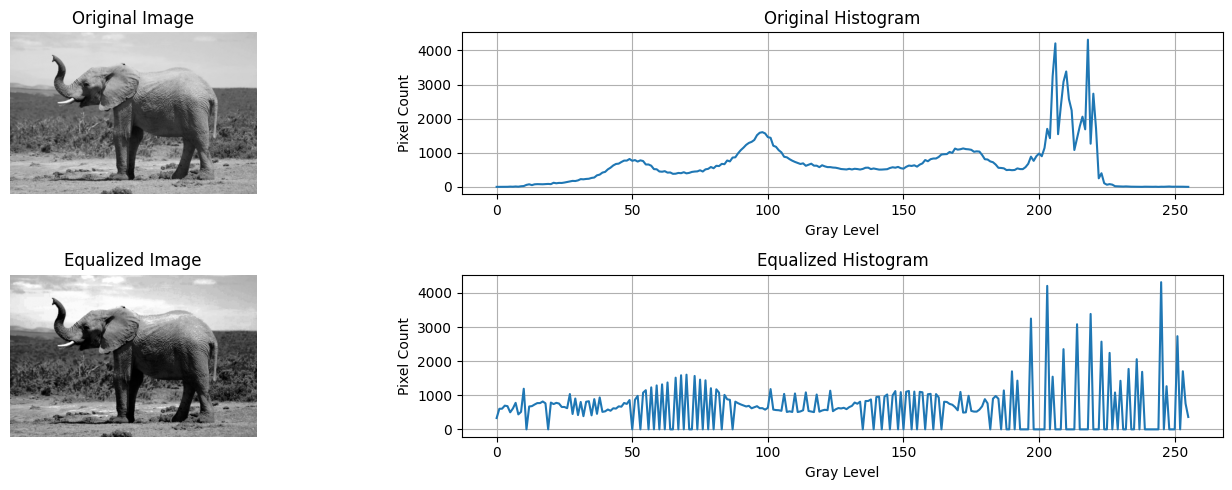

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def analyze_grayscale_histogram(image_path):
    """
    Analyze and display histogram for a grayscale image using both methods (M1 and M2).
    """
    # Read image and convert to grayscale if needed
    img = cv2.imread(image_path)
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img

    # Method 1: Calculate histogram (pixel counts)
    hist_m1 = cv2.calcHist([gray], [0], None, [256], [0, 256])
# gray for grayscaled img ,
# [0] for number of channels in the gray scaled img
# None for taking the entire img into considereationa nd not jsut a masked area
# [256] for number if bins,possible itensity values
# [0,256] range

    # Method 2: Calculate probability distribution
    hist_m2 = hist_m1 / (gray.shape[0] * gray.shape[1])
#  hist_m1: count of pixels for each intensity level
#gray.shape[0]: number of rows
#gray.shape[1]: number of columns

    # Create subplots
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(131)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    # M1: Pixel Count Histogram
    plt.subplot(132)
    plt.plot(hist_m1)
    plt.title('M1: Pixel Count Histogram')
    plt.xlabel('Gray Level')
    plt.ylabel('Pixel Count')
    plt.grid(True)

    # M2: Probability Distribution
    plt.subplot(133)
    plt.plot(hist_m2)
    plt.title('M2: Probability Distribution')
    plt.xlabel('Gray Level')
    plt.ylabel('Probability')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return gray, hist_m1, hist_m2

def analyze_color_histogram(image_path):
    """
    Analyze and display histogram for each channel of a color image in RGB format .
    """
    # Read color image
    img = cv2.imread(image_path)
    # Convert from BGR to RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Split channels
    b, g, r = cv2.split(img)

    # Calculate histograms for each channel
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

    # Create subplots
    plt.figure(figsize=(15, 5))

    # Original Image
    plt.subplot(121)
    plt.imshow(img_rgb)
    plt.title('Color Image')
    plt.axis('off')

    # Color Histograms
    plt.subplot(122)
    plt.plot(hist_b, color='blue', label='Blue')
    plt.plot(hist_g, color='green', label='Green')
    plt.plot(hist_r, color='red', label='Red')
    plt.title('Color Channel Histograms')
    plt.xlabel('Intensity Level')
    plt.ylabel('Pixel Count')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return img_rgb, (hist_b, hist_g, hist_r)

def analyze_brightness_effect(image_path):
    """
    Analyze how increasing or decreasing brightness affects the histogram.
    """
    # Read and convert image to grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Create bright and dark versions by adding and sub in each pixel value
    bright = cv2.add(gray, 50)  # Add 50 to increase brightness
    dark = cv2.subtract(gray, 50)  # Subtract 50 to decrease brightness

    # Calculate histograms
    hist_original = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist_bright = cv2.calcHist([bright], [0], None, [256], [0, 256])
    hist_dark = cv2.calcHist([dark], [0], None, [256], [0, 256])

    # Display results
    plt.figure(figsize=(15, 10))

    # Original Image and Histogram
    plt.subplot(321)
    plt.imshow(gray, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(322)
    plt.plot(hist_original)
    plt.title('Original Histogram')
    plt.xlabel('Gray Level')
    plt.ylabel('Pixel Count')
    plt.grid(True)

    # Bright Image and Histogram
    plt.subplot(323)
    plt.imshow(bright, cmap='gray')
    plt.title('Bright Image')
    plt.axis('off')

    plt.subplot(324)
    plt.plot(hist_bright)
    plt.title('Bright Image Histogram')
    plt.xlabel('Gray Level')
    plt.ylabel('Pixel Count')
    plt.grid(True)

    # Dark Image and Histogram
    plt.subplot(325)
    plt.imshow(dark, cmap='gray')
    plt.title('Dark Image')
    plt.axis('off')

    plt.subplot(326)
    plt.plot(hist_dark)
    plt.title('Dark Image Histogram')
    plt.xlabel('Gray Level')
    plt.ylabel('Pixel Count')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return (gray, bright, dark), (hist_original, hist_bright, hist_dark)

def enhance_contrast(image_path):
    """
    Enhance image contrast using histogram equalization.
    """
    # Read and convert image to grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization
    equalized = cv2.equalizeHist(gray)
    # uses cdf(cumulative freq distribution) for each pixel value, distributes the pixel range over a large area [0,255]

    # Calculate histograms
    hist_original = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist_equalized = cv2.calcHist([equalized], [0], None, [256], [0, 256])

    # Display results
    plt.figure(figsize=(15, 5))

    # Original Image and Histogram
    plt.subplot(221)
    plt.imshow(gray, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(222)
    plt.plot(hist_original)
    plt.title('Original Histogram')
    plt.xlabel('Gray Level')
    plt.ylabel('Pixel Count')
    plt.grid(True)

    # Equalized Image and Histogram
    plt.subplot(223)
    plt.imshow(equalized, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(224)
    plt.plot(hist_equalized)
    plt.title('Equalized Histogram')
    plt.xlabel('Gray Level')
    plt.ylabel('Pixel Count')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return (gray, equalized), (hist_original, hist_equalized)

# Example usage
if __name__ == "__main__":
    image_path = "/content/elephant.png"  # Replace with your image path

    # 1. Analyze grayscale histogram
    gray_img, hist_m1, hist_m2 = analyze_grayscale_histogram(image_path)

    # 2. Analyze color histogram
    color_img, color_hists = analyze_color_histogram(image_path)

    # 3. Analyze brightness effects
    brightness_imgs, brightness_hists = analyze_brightness_effect(image_path)

    # 4. Enhance contrast using histogram equalization
    contrast_imgs, contrast_hists = enhance_contrast(image_path)

    '''
    Histogram Calculation (cv2.calcHist): Extracts pixel intensity distribution.
Brightness Adjustment (cv2.add & cv2.subtract): Simulates overexposure(add 50 ) and underexposure( sub 50).
Contrast Enhancement (cv2.equalizeHist): Spreads pixel intensities for better visibility.
Plotting with Matplotlib (plt.plot(), plt.imshow()): Visual representation of images and histograms.
    '''

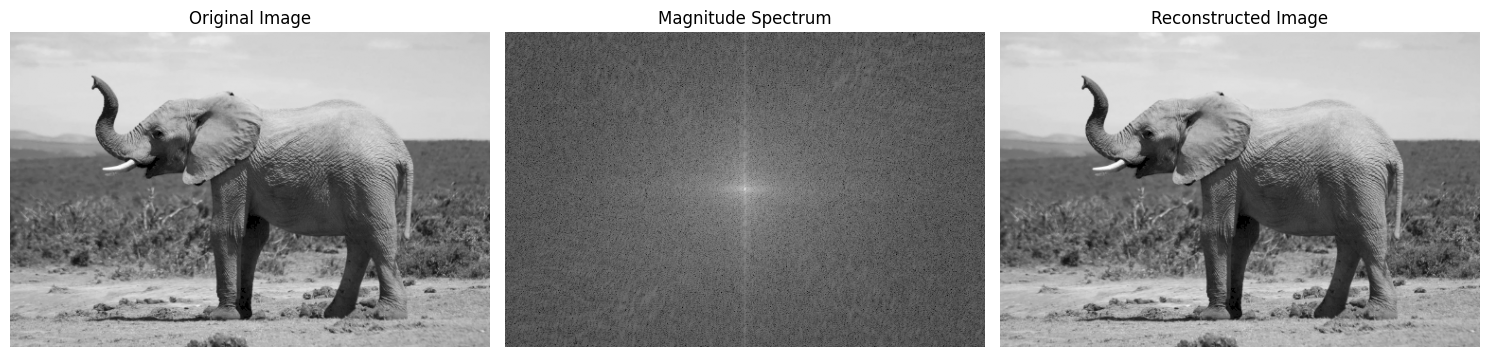

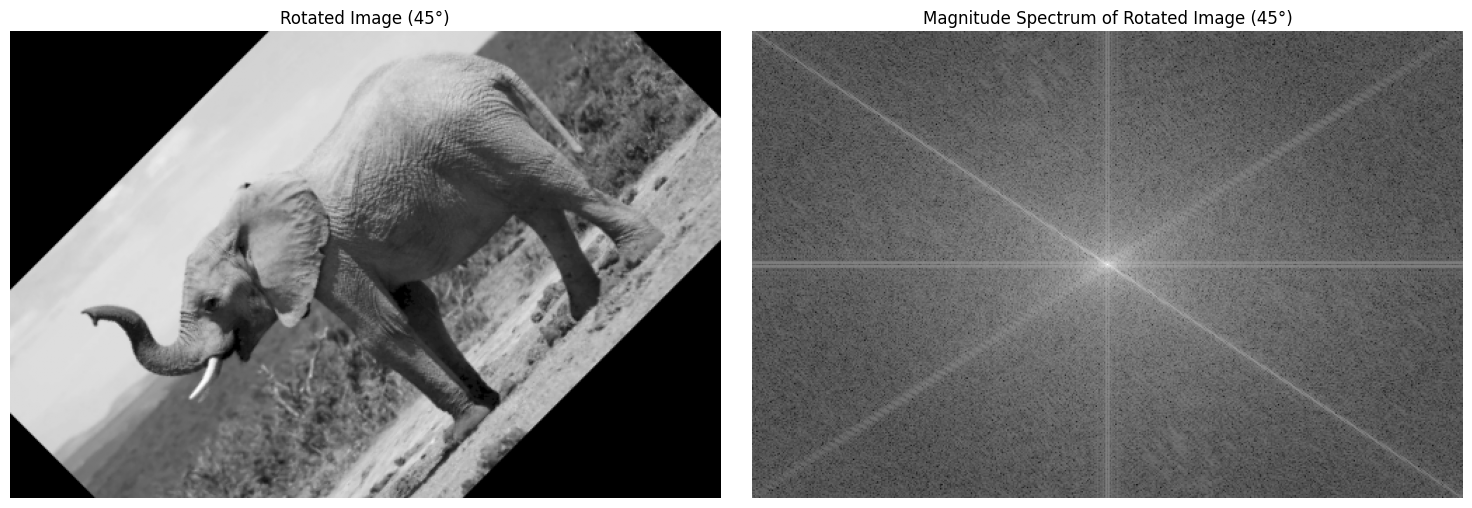

Mean Squared Error between original and reconstructed: 2.020124412808276e-27


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_images(images, titles, cmaps=None, figsize=(15, 5)):
    """Helper function to plot multiple images side by side"""
    fig, axes = plt.subplots(1, len(images), figsize=figsize)

    if len(images) == 1:
        axes = [axes]

    for i, (img, title) in enumerate(zip(images, titles)):
        cmap = cmaps[i] if cmaps else 'gray'
        axes[i].imshow(img, cmap=cmap)
        axes[i].set_title(title)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

def compute_fft_magnitude(image):
    """Compute FFT and return magnitude spectrum
    changes the time domain data(amplitude-time) to freq domain data(amplitude-freq) , changes the signal in time domain to sine wave
    """
    # Apply FFT, center oft he transformed img meand lowfreq and corners mean high freq
    f_transform = np.fft.fft2(image)
    # Shift zero frequency to center of the spectrum
    f_transform_shifted = np.fft.fftshift(f_transform)
    # Compute magnitude spectrum (log scale for better visualization)
    magnitude_spectrum = np.log1p(np.abs(f_transform_shifted))
    return f_transform_shifted, magnitude_spectrum

def reconstruct_image(f_transform_shifted):
    """Reconstruct image from Fourier transform"""
    # Inverse shift
    f_transform = np.fft.ifftshift(f_transform_shifted)
    # Apply inverse FFT
    reconstructed = np.fft.ifft2(f_transform)
    # Get real part and ensure proper scaling
    reconstructed = np.real(reconstructed)
    return reconstructed

def rotate_image(image, angle):
    """Rotate image by specified angle"""
    rows, cols = image.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated = cv2.warpAffine(image, M, (cols, rows))
    return rotated

# Main process
def process_image(image_path, rotation_angle=45):
    # Read and convert image to grayscale
    original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 1. Compute FFT and magnitude spectrum
    f_transform_shifted, magnitude_spectrum = compute_fft_magnitude(original)

    # 2. Reconstruct image using IFFT
    reconstructed = reconstruct_image(f_transform_shifted)

    # Display original processing results
    plot_images([original, magnitude_spectrum, reconstructed],
                ['Original Image', 'Magnitude Spectrum', 'Reconstructed Image'])

    # 3. Verify rotation property
    # Rotate original image
    rotated = rotate_image(original, rotation_angle)

    # Compute FFT of rotated image
    f_transform_shifted_rot, magnitude_spectrum_rot = compute_fft_magnitude(rotated)

    # Display rotation results
    plot_images([rotated, magnitude_spectrum_rot],
                [f'Rotated Image ({rotation_angle}°)',
                 f'Magnitude Spectrum of Rotated Image ({rotation_angle}°)'])

    # Compute and print Mean Squared Error between original and reconstructed
    mse = np.mean((original - reconstructed) ** 2)
    print(f"Mean Squared Error between original and reconstructed: {mse}")

    return original, magnitude_spectrum, reconstructed, rotated, magnitude_spectrum_rot

# Example usage
if __name__ == "__main__":
    # Replace with your image path
    image_path = "/content/elephant.png"
    results = process_image(image_path, rotation_angle=45)